In [4]:
import numpy as np
from urllib.request import urlopen
import scipy.optimize
import random
from math import exp
from math import log

In [3]:
def parseData(fname):
  for l in urlopen(fname):
    yield eval(l)

print("Reading data...")
data = list(parseData("http://jmcauley.ucsd.edu/cse190/data/beer/beer_50000.json"))
print("done")

def feature(datum):
  feat = [1, datum['review/taste'], datum['review/appearance'], datum['review/aroma'], datum['review/palate'], datum['review/overall']]
  return feat

X = [feature(d) for d in data]
y = [d['beer/ABV'] >= 6.5 for d in data]

def inner(x,y):
  return sum([x[i]*y[i] for i in range(len(x))])

def sigmoid(x):
  return 1.0 / (1 + exp(-x))

Reading data...
done


In [4]:
##################################################
# Logistic regression by gradient ascent         #
##################################################

# NEGATIVE Log-likelihood
def f(theta, X, y, lam):
  loglikelihood = 0
  for i in range(len(X)):
    logit = inner(X[i], theta)
    loglikelihood -= log(1 + exp(-logit))
    if not y[i]:
      loglikelihood -= (1.05*logit)
  for k in range(len(theta)):
    loglikelihood -= lam * theta[k]*theta[k]
  # for debugging
  # print("ll =" + str(loglikelihood))
  return -loglikelihood

# NEGATIVE Derivative of log-likelihood
def fprime(theta, X, y, lam):
  dl = [0]*len(theta)
  for i in range(len(X)):
    logit = inner(X[i], theta)
    for k in range(len(theta)):
      dl[k] += X[i][k] * (1 - sigmoid(logit))
      if not y[i]:
        dl[k] -= X[i][k]
  for k in range(len(theta)):
    dl[k] -= lam*2*theta[k]
  return np.array([-x for x in dl])


In [5]:
X_train = X
y_train = y

In [6]:

# split into 1/3 train, 1/3 validation, 1/3 test

Z = list(zip(X, y))

random.shuffle(Z)

x_shuffled, y_shuffled = zip(*Z)

print("X shuffled: ", np.shape(x_shuffled))
print("y shuffled: ", np.shape(y_shuffled))

samples = len(x_shuffled)

X_train = x_shuffled[0:round(samples/3)];
y_train = y_shuffled[0:round(samples/3)];

X_validation = x_shuffled[round(samples/3) + 1: 2 * round(samples/3)]
y_validation = y_shuffled[round(samples/3) + 1: 2 * round(samples/3)]

X_test = x_shuffled[2 * round(samples/3) + 1:samples]
y_test = y_shuffled[2 * round(samples/3) + 1:samples]

print("x train: ", np.shape(X_train), "x validate: ", np.shape(X_validation), "x test: ", np.shape(X_test))
print("y train: ", np.shape(y_train), "y validate: ", np.shape(y_validation), "y test: ", np.shape(y_test))



X shuffled:  (50000, 6)
y shuffled:  (50000,)
x train:  (16667, 6) x validate:  (16666, 6) x test:  (16665, 6)
y train:  (16667,) y validate:  (16666,) y test:  (16665,)


In [7]:
##################################################
# Train                                          #
##################################################

def train(lam):
  theta,_,_ = scipy.optimize.fmin_l_bfgs_b(f, [0]*len(X[0]), fprime, pgtol = 10, args = (X_train, y_train, lam))
  return theta


In [8]:
##################################################
# Predict                                        #
##################################################

def performance(theta, X, y):
  scores = [inner(theta,x) for x in X]
  predictions = [s > 0 for s in scores]
    
  positives = sum(predictions)
  negatives = len(predictions) - sum(predictions)
    
  correct = [(a==b) for (a,b) in zip(predictions, y)]
    
  truePositives = sum(correct)
  trueNegatives = len(correct) - sum(correct)

  falsePositives = sum([(a==1 and b==0) for (a,b) in zip(predictions,y)])
  falseNegatives = sum([(a==0 and b==1) for (a,b) in zip(predictions,y)])
 
  acc = sum(correct) * 1.0 / len(correct)
  return acc, positives, negatives, truePositives, trueNegatives, falsePositives, falseNegatives


In [9]:
##################################################
# Validation pipeline                            #
##################################################
lam = 1.0
theta = train(lam)

In [10]:
labels  = ["Training Set", "Validation Set", "Testing Set"]
corpusX = [X_train, X_validation, X_test]
corpusY = [y_train, y_validation, y_test]

for (label, x, y) in zip(labels, corpusX, corpusY):
    print("==================================================")
    print(label, "\n")
    acc, positives, negatives, truePositives, trueNegatives, falsePositives, falseNegatives = performance(theta, x, y)
    
    print("Positives: ", positives)
    print("Negatives: ", negatives, "\n")

    print("True Positives: ", truePositives)
    print("True Positives: ", trueNegatives, "\n")
    
    print("False Positives: ", falsePositives)
    print("False Negatives: ", falseNegatives, "\n")
    
    print("lambda = " + str(lam) + ":\taccuracy=" + str(acc), "\n")


Training Set 

Positives:  13214
Negatives:  3453 

True Positives:  11265
True Positives:  5402 

False Positives:  4161
False Negatives:  1241 

lambda = 1.0:	accuracy=0.6758864822703546 

Validation Set 

Positives:  13274
Negatives:  3392 

True Positives:  11220
True Positives:  5446 

False Positives:  4169
False Negatives:  1277 

lambda = 1.0:	accuracy=0.6732269290771631 

Testing Set 

Positives:  13279
Negatives:  3386 

True Positives:  11397
True Positives:  5268 

False Positives:  4028
False Negatives:  1240 

lambda = 1.0:	accuracy=0.6838883888388839 



In [11]:

for (label, x, y) in zip(labels, corpusX, corpusY):
    print("==================================================")
    print(label, "\n")
    acc, positives, negatives, truePositives, trueNegatives, falsePositives, falseNegatives = performance(theta, x, y)
    
    print("Positives: ", positives)
    print("Negatives: ", negatives, "\n")

    print("True Positives: ", truePositives)
    print("True Positives: ", trueNegatives, "\n")
    
    print("False Positives: ", falsePositives)
    print("False Negatives: ", falseNegatives, "\n")
    
    print("lambda = " + str(lam) + ":\taccuracy=" + str(acc), "\n")


Training Set 

Positives:  13214
Negatives:  3453 

True Positives:  11265
True Positives:  5402 

False Positives:  4161
False Negatives:  1241 

lambda = 1.0:	accuracy=0.6758864822703546 

Validation Set 

Positives:  13274
Negatives:  3392 

True Positives:  11220
True Positives:  5446 

False Positives:  4169
False Negatives:  1277 

lambda = 1.0:	accuracy=0.6732269290771631 

Testing Set 

Positives:  13279
Negatives:  3386 

True Positives:  11397
True Positives:  5268 

False Positives:  4028
False Negatives:  1240 

lambda = 1.0:	accuracy=0.6838883888388839 



In [12]:
lambdas = [0, 0.01, 0.1, 1, 100]
labels  = ["Training Set", "Validation Set", "Testing Set"]
corpusX = [X_train, X_validation, X_test]
corpusY = [y_train, y_validation, y_test]

acc = []
positives = []
negatives = []
truePositives = []
trueNegatives = []
falsePositives = []
falseNegatives = []

for lam in lambdas:
    theta = train(lam)
    for (x, y) in zip(corpusX, corpusY):
        _acc, _positives, _negatives, _truePositives, _trueNegatives, _falsePositives, _falseNegatives \
            = performance(theta, x, y)
            
        acc.append(_acc)
        positives.append(_positives)
        negatives.append(_negatives)
        truePositives.append(_truePositives)
        trueNegatives.append(_trueNegatives)
        falsePositives.append(_falsePositives)
        falseNegatives.append(_falseNegatives)

In [13]:
print("Lambdas:         ", end='') 
[print("%.3f " % val, end='') for val in np.repeat(lambdas,3)]
print("\nAccuracy:        ", end='') 
[print("%.3f " % val, end='') for val in acc]

print("\n\nPositives:       ", end='') 
[print("%5d " % val, end='') for val in positives]
print("\nNegatives:       ", end='') 
[print("%5d " % val, end='') for val in negatives]

print("\n\nTrue Positives:  ", end='') 
[print("%5d " % val, end='') for val in truePositives]
print("\nTrue Negatives:  ", end='') 
[print("%5d " % val, end='') for val in trueNegatives]

print("\n\nFalse Positives: ", end='') 
[print("%5d " % val, end='') for val in falsePositives]
print("\nFalse Negatives: ", end='') 
[print("%5d " % val, end='') for val in falseNegatives];

Lambdas:         0.000 0.000 0.000 0.010 0.010 0.010 0.100 0.100 0.100 1.000 1.000 1.000 100.000 100.000 100.000 
Accuracy:        0.676 0.674 0.684 0.676 0.674 0.684 0.676 0.674 0.684 0.676 0.673 0.684 0.667 0.667 0.677 

Positives:       13196 13249 13260 13196 13249 13260 13196 13249 13260 13214 13274 13279 14728 14719 14744 
Negatives:        3471  3417  3405  3471  3417  3405  3471  3417  3405  3453  3392  3386  1939  1947  1921 

True Positives:  11275 11231 11404 11275 11231 11404 11275 11231 11404 11265 11220 11397 11125 11109 11274 
True Negatives:   5392  5435  5261  5392  5435  5261  5392  5435  5261  5402  5446  5268  5542  5557  5391 

False Positives:  4147  4151  4015  4147  4151  4015  4147  4151  4015  4161  4169  4028  4988  4947  4822 
False Negatives:  1245  1284  1246  1245  1284  1246  1245  1284  1246  1241  1277  1240   554   610   569 

In [ ]:
### Network visualization ###
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.pyplot as plt

In [6]:
edges = set()
nodes = set()
for edge in urlopen("http://jmcauley.ucsd.edu/cse255/data/facebook/egonet.txt"):
  x,y = edge.split()
  x,y = int(x),int(y)
  edges.add((x,y))
  edges.add((y,x))
  nodes.add(x)
  nodes.add(y)

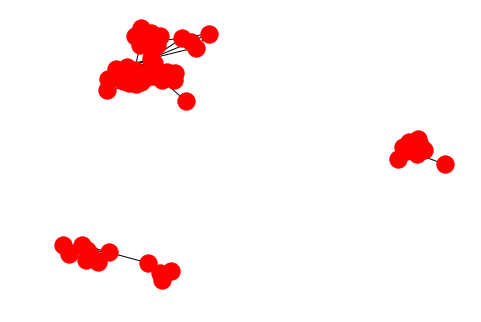

In [7]:
G = nx.Graph()
for e in edges:
  G.add_edge(e[0],e[1])
nx.draw(G)
plt.show()
plt.clf()

In [8]:
print("Number of Connected Components: ", nx.number_connected_components(G))
print("Largest Connected Component:", max([len(x) for x in nx.connected_components(G)]))

Number of Connected Components:  3
Largest Connected Component: 40


In [9]:
largest_cc = sorted(max(nx.connected_components(G), key=len))

half = round(len(largest_cc)/2)

split_lo = largest_cc[:half]
split_hi = largest_cc[half:]

print("Low IDs:  ", split_lo)
print("High IDs: ", split_hi)
print("Normalized Cut Cost: ", (1/2)*nx.normalized_cut_size(G, split_lo, split_hi))

Low IDs:   [697, 703, 708, 713, 719, 729, 745, 747, 753, 769, 772, 774, 798, 800, 803, 804, 805, 810, 811, 819]
High IDs:  [823, 825, 828, 830, 840, 856, 861, 863, 864, 869, 876, 878, 880, 882, 884, 886, 888, 889, 890, 893]
Normalized Cut Cost:  0.4224058769513316


In [10]:
largest_cc = sorted(max(nx.connected_components(G), key=len))

half = round(len(largest_cc)/2)

split_lo = largest_cc[:half]
split_hi = largest_cc[half:]

prevCost = 0;
currCost = (1/2)*nx.normalized_cut_size(G, split_lo, split_hi)

iter = 0
while prevCost != currCost:
    iter += 1
    prevCost = currCost
    lo = [i for i in split_lo] # deep copy
    hi = [i for i in split_hi] # deep copy
    
    # move lo to hi if cut cost is lower
    for val in split_lo:          
        lo.remove(val)
        hi.append(val)
        newCost = (1/2)*nx.normalized_cut_size(G, lo, hi)
        
        if(newCost > currCost): # not lower, restore
            lo.append(val)
            hi.remove(val)
        else:
            currCost = newCost # update current cost

    # move hi to lo if cut cost is lower
    for val in split_hi:
        lo.append(val)
        hi.remove(val)
        newCost = (1/2)*nx.normalized_cut_size(G, lo, hi)
        
        if(newCost > currCost): # not lower, restore
            lo.remove(val)
            hi.append(val)
        else:
            currCost = newCost # update current cost
           
    split_lo = [i for i in lo] # deep copy
    split_hi = [i for i in hi] # deep copy
    
print("\nNumber of Iterations: ", iter)
print("New Low IDs:  ", sorted(split_lo))
print("New High IDs: ", sorted(split_hi))
print("Normalized Cut Cost: ", (1/2)*nx.normalized_cut_size(G, split_lo, split_hi))


Number of Iterations:  3
New Low IDs:   [697, 703, 708, 713, 719, 745, 747, 753, 769, 772, 774, 798, 800, 803, 805, 810, 811, 819, 823, 828, 830, 840, 856, 869, 880, 890]
New High IDs:  [729, 804, 825, 861, 863, 864, 876, 878, 882, 884, 886, 888, 889, 893]
Normalized Cut Cost:  0.09817045961624274


In [29]:
# find max modularity of all cc
# idx
max_modularity = list(greedy_modularity_communities(G))

print("Community Size:      ", len(largest_cc))
print("Max Modularity Size: ", len(max_modularity[0]), "\n")

print("Largest Community:   ", largest_cc)
print("Max Modularity Size: ", sorted(max_modularity[0]))


Community Size:       40
Max Modularity Size:  19 

Largest Community:    [697, 703, 708, 713, 719, 729, 745, 747, 753, 769, 772, 774, 798, 800, 803, 804, 805, 810, 811, 819, 823, 825, 828, 830, 840, 856, 861, 863, 864, 869, 876, 878, 880, 882, 884, 886, 888, 889, 890, 893]
Max Modularity Size:  [697, 703, 708, 713, 719, 745, 747, 772, 774, 800, 803, 805, 810, 819, 823, 828, 830, 840, 880]
